In [17]:
import numpy as np
import matplotlib.pyplot as plt
import time


# Factory and Departments Setup

In [18]:
#Factory Size is 16 lines for 14 columns
factory_size = (16, 14)

# Department areas (counted from the grid)
departments_area = {
    "1": 12,  
    "2": 2,   
    "3": 28,  
    "4": 30,  
    "5": 4,   
    "6": 4,   
    "7": 4,   
    "8": 70,  
    "9": 28,  
    "A": 24,   
    "B": 18,   
}


total_area = sum(departments_area.values())
print("Total area:", total_area, factory_size[0] * factory_size[1])



Total area: 224 224


## Possible blocks precomputed

In [19]:
def possible_blocks(area, factory_size):
    """Return all (rows, cols) factorizations of area that fit inside the factory."""
    rows, cols = factory_size
    factors = []
    for h in range(1, int(area**0.5)+1):
        if area % h == 0:
            w = area // h
            # check if it fits in factory
            if h <= rows and w <= cols:
                factors.append((h, w))
            if h != w and w <= rows and h <= cols:
                factors.append((w, h))
    return factors


# Precompute possible blocks for each department
dept_blocks = {dept: possible_blocks(area, factory_size) 
               for dept, area in departments_area.items()}

for dept, blocks in dept_blocks.items():
    print(f"Department {dept} (area {departments_area[dept]}): {blocks}")


Department 1 (area 12): [(1, 12), (12, 1), (2, 6), (6, 2), (3, 4), (4, 3)]
Department 2 (area 2): [(1, 2), (2, 1)]
Department 3 (area 28): [(2, 14), (14, 2), (4, 7), (7, 4)]
Department 4 (area 30): [(15, 2), (3, 10), (10, 3), (5, 6), (6, 5)]
Department 5 (area 4): [(1, 4), (4, 1), (2, 2)]
Department 6 (area 4): [(1, 4), (4, 1), (2, 2)]
Department 7 (area 4): [(1, 4), (4, 1), (2, 2)]
Department 8 (area 70): [(5, 14), (14, 5), (7, 10), (10, 7)]
Department 9 (area 28): [(2, 14), (14, 2), (4, 7), (7, 4)]
Department A (area 24): [(2, 12), (12, 2), (3, 8), (8, 3), (4, 6), (6, 4)]
Department B (area 18): [(2, 9), (9, 2), (3, 6), (6, 3)]


In [20]:
# ANSI 256-color background
def bg256(n):
    return f"\033[48;5;{n}m"
RESET = "\033[0m"

# pick as many distinct colors as departments
ansi_colors = [bg256(i) for i in [160, 34, 220, 27, 201, 51, 208, 129, 118, 244, 45]]
color_map = {dept: ansi_colors[i] for i, dept in enumerate(departments_area)}

def print_colored_grid(grid):
    rows, cols = grid.shape
    for r in range(rows):
        line = ""
        for c in range(cols):
            d = grid[r, c]
            if d == ".":
                line += " . "
            else:
                line += color_map[d] + f" {d} " + RESET
        print(line)


## Cost logic

In [21]:
flows = {
    ("1","2"): 0,   ("2","1"): 0,
    ("1","3"): 50,  ("3","1"): 50,
    ("1","4"): 0,   ("4","1"): 0,
    ("1","5"): 30,  ("5","1"): 30,
    ("1","6"): 10,  ("6","1"): 10,
    ("1","7"): 20,  ("7","1"): 20,
    ("1","8"): 10,  ("8","1"): 10,
    ("1","9"): 10,  ("9","1"): 10,
    ("1","A"): 15,  ("A","1"): 15,
    ("1","B"): 0,   ("B","1"): 0,

    ("2","3"): 40,  ("3","2"): 40,
    ("2","4"): 0,   ("4","2"): 0,
    ("2","5"): 20,  ("5","2"): 20,
    ("2","6"): 15,  ("6","2"): 15,
    ("2","7"): 0,   ("7","2"): 0,
    ("2","8"): 10,  ("8","2"): 10,
    ("2","9"): 0,   ("9","2"): 0,
    ("2","A"): 20,  ("A","2"): 20,
    ("2","B"): 0,   ("B","2"): 0,

    ("3","4"): 0,   ("4","3"): 0,
    ("3","5"): 0,   ("5","3"): 0,
    ("3","6"): 15,  ("6","3"): 15,
    ("3","7"): 20,  ("7","3"): 20,
    ("3","8"): 40,  ("8","3"): 40,
    ("3","9"): 50,  ("9","3"): 50,
    ("3","A"): 30,  ("A","3"): 30,
    ("3","B"): 0,   ("B","3"): 0,

    ("4","5"): 0,   ("5","4"): 0,
    ("4","6"): 13,  ("6","4"): 13,
    ("4","7"): 100, ("7","4"): 100,
    ("4","8"): 30,  ("8","4"): 30,
    ("4","9"): 50,  ("9","4"): 50,
    ("4","A"): 80,  ("A","4"): 80,
    ("4","B"): 80,  ("B","4"): 80,

    ("5","6"): 45,  ("6","5"): 45,
    ("5","7"): 0,   ("7","5"): 0,
    ("5","8"): 30,  ("8","5"): 30,
    ("5","9"): 90,  ("9","5"): 90,
    ("5","A"): 70,  ("A","5"): 70,
    ("5","B"): 0,   ("B","5"): 0,

    ("6","7"): 90,  ("7","6"): 90,
    ("6","8"): 40,  ("8","6"): 40,
    ("6","9"): 40,  ("9","6"): 40,
    ("6","A"): 20,  ("A","6"): 20,
    ("6","B"): 20,  ("B","6"): 20,

    ("7","8"): 0,   ("8","7"): 0,
    ("7","9"): 0,   ("9","7"): 0,
    ("7","A"): 0,   ("A","7"): 0,
    ("7","B"): 20,  ("B","7"): 20,

    ("8","9"): 50,  ("9","8"): 50,
    ("8","A"): 60,  ("A","8"): 60,
    ("8","B"): 0,   ("B","8"): 0,

    ("9","A"): 40,  ("A","9"): 40,
    ("9","B"): 0,   ("B","9"): 0,

    ("A","B"): 0,   ("B","A"): 0,
}

def dept_distance_edge(sol, deptA, deptB):
    """
    Compute the edge-to-edge Manhattan distance between two rectangular departments.
    sol: dict mapping dept -> (row, col, height, width)
    deptA, deptB: department IDs
    """
    r1, c1, h1, w1 = sol[deptA]
    r2, c2, h2, w2 = sol[deptB]

    # bounds of deptA
    r1_min, r1_max = r1, r1 + h1 - 1
    c1_min, c1_max = c1, c1 + w1 - 1

    # bounds of deptB
    r2_min, r2_max = r2, r2 + h2 - 1
    c2_min, c2_max = c2, c2 + w2 - 1

    # vertical gap
    if r1_max < r2_min:
        dy = r2_min - r1_max - 1
    elif r2_max < r1_min:
        dy = r1_min - r2_max - 1
    else:
        dy = 0

    # horizontal gap
    if c1_max < c2_min:
        dx = c2_min - c1_max - 1
    elif c2_max < c1_min:
        dx = c1_min - c2_max - 1
    else:
        dx = 0

    return dx + dy

def total_cost(sol, flows):
    """
    Compute the total load-distance cost of a layout solution.
    sol: dict dept -> (row, col, height, width)
    flows: dict (deptA, deptB) -> flow value (symmetric)
    """
    cost = 0
    for (i, j), flow in flows.items():
        if i == j:
            continue  # no self-flow
        if i in sol and j in sol:
            d = dept_distance_edge(sol, i, j)
            cost += flow * d
    return cost




# Find the first solution



In [22]:


def place_blocks(factory_size, dept_blocks, departments_area):
    rows, cols = factory_size
    grid = np.full((rows, cols), ".", dtype=object)  # empty factory

    used = set()  # keep track of placed departments
    solution = {}

    def find_next_empty():
        for r in range(rows):
            for c in range(cols):
                if grid[r, c] == ".":
                    return r, c
        return None  # no empty cells left

    def can_place(dept, r, c, h, w):
        if r + h > rows or c + w > cols:
            return False
        for i in range(r, r + h):
            for j in range(c, c + w):
                if grid[i, j] != ".":
                    return False
        return True

    def set_block(dept, r, c, h, w, val):
        """Fill or clear cells with dept id (or '.')"""
        for i in range(r, r + h):
            for j in range(c, c + w):
                grid[i, j] = dept if val else "."

    def backtrack():
        if len(used) == len(departments_area):  # all departments placed
            return True

        pos = find_next_empty()
        if pos is None:
            return False
        r, c = pos

        for dept in departments_area:
            if dept in used:
                continue
            for (h, w) in dept_blocks[dept]:
                if can_place(dept, r, c, h, w):
                    # place
                    set_block(dept, r, c, h, w, True)
                    used.add(dept)
                    solution[dept] = (r, c, h, w)

                    if backtrack():
                        return True

                    # undo
                    set_block(dept, r, c, h, w, False)
                    used.remove(dept)
                    del solution[dept]

        return False

    if backtrack():
        return grid, solution
    else:
        return None, None

grid, sol = place_blocks(factory_size, dept_blocks, departments_area)



if grid is not None:
    print("Solution found!")
    print_colored_grid(grid)
else:
    print("No solution found.")

#! Area Check
# used_area = sum(departments_area[dept] for dept in sol)
# print("Used area:", used_area, "of", total_area)
# #check area of each department
# for dept, (r, c, h, w) in sol.items():
#     area = h * w
#     expected = departments_area[dept]
#     print(f"Dept {dept}: placed area {area}, expected {expected}, match: {area == expected}")

#! Distance Check
print("\n")
print("Distance 1-2 is", dept_distance_edge(sol, "1", "2"))
print("Distance 1-3 is", dept_distance_edge(sol, "1", "3"))
print("Distance 1-4 is", dept_distance_edge(sol, "1", "4"))
print("Distance 1-5 is", dept_distance_edge(sol, "1", "5"))
print("Distance 1-6 is", dept_distance_edge(sol, "1", "6"))
print("Distance 1-7 is", dept_distance_edge(sol, "1", "7"))
print("Distance 1-8 is", dept_distance_edge(sol, "1", "8"))
print("Distance 1-9 is", dept_distance_edge(sol, "1", "9"))
print("Distance 1-A is", dept_distance_edge(sol, "1", "A")) 
print("Distance 1-B is", dept_distance_edge(sol, "1", "B"))
print("\n")

#! Cost Check
print("\n Total cost is", total_cost(sol, flows))
    

Solution found!
 1  1  1  1  1  1  1  1  1  1  1  1  2  2 
 3  3  3  3  3  3  3  3  3  3  3  3  3  3 
 3  3  3  3  3  3  3  3  3  3  3  3  3  3 
 4  4  4  4  4  4  4  4  4  4  5  5  5  5 
 4  4  4  4  4  4  4  4  4  4  6  6  6  6 
 4  4  4  4  4  4  4  4  4  4  7  7  7  7 
 8  8  8  8  8  8  8  8  8  8  8  8  8  8 
 8  8  8  8  8  8  8  8  8  8  8  8  8  8 
 8  8  8  8  8  8  8  8  8  8  8  8  8  8 
 8  8  8  8  8  8  8  8  8  8  8  8  8  8 
 8  8  8  8  8  8  8  8  8  8  8  8  8  8 
 9  9  9  9  9  9  9  9  9  9  9  9  9  9 
 9  9  9  9  9  9  9  9  9  9  9  9  9  9 
 A  A  A  A  A  A  A  A  B  B  B  B  B  B 
 A  A  A  A  A  A  A  A  B  B  B  B  B  B 
 A  A  A  A  A  A  A  A  B  B  B  B  B  B 


Distance 1-2 is 0
Distance 1-3 is 0
Distance 1-4 is 2
Distance 1-5 is 2
Distance 1-6 is 3
Distance 1-7 is 4
Distance 1-8 is 5
Distance 1-9 is 10
Distance 1-A is 12
Distance 1-B is 12



 Total cost is 11120


# Depth First Search
## And print all solutions


In [37]:
import time

def place_blocks_all(factory_size, dept_blocks, departments_area, time_limit=5.0):
    rows, cols = factory_size
    grid = np.full((rows, cols), ".", dtype=object)  # empty factory
    used = set()
    solution = {}
    solutions = []

    start = time.time()

    def find_next_empty():
        for r in range(rows):
            for c in range(cols):
                if grid[r, c] == ".":
                    return r, c
        return None

    def can_place(dept, r, c, h, w):
        if r + h > rows or c + w > cols:
            return False
        for i in range(r, r + h):
            for j in range(c, c + w):
                if grid[i, j] != ".":
                    return False
        return True

    def set_block(dept, r, c, h, w, val):
        for i in range(r, r + h):
            for j in range(c, c + w):
                grid[i, j] = dept if val else "."

    def backtrack():
        # stop if time is up
        if time.time() - start > time_limit:
            return

        if len(used) == len(departments_area):
            # found full solution
            solutions.append((grid.copy(), solution.copy()))
            # continue searching for more
            return

        pos = find_next_empty()
        if pos is None:
            return
        r, c = pos

        for dept in departments_area:
            if dept in used:
                continue
            for (h, w) in dept_blocks[dept]:
                if can_place(dept, r, c, h, w):
                    # place
                    set_block(dept, r, c, h, w, True)
                    used.add(dept)
                    solution[dept] = (r, c, h, w)

                    backtrack()  # continue deeper

                    # undo
                    set_block(dept, r, c, h, w, False)
                    used.remove(dept)
                    del solution[dept]

    backtrack()
    return solutions


In [40]:
solutions = place_blocks_all(factory_size, dept_blocks, departments_area, time_limit=30)

print(f"Found {len(solutions)} solutions in 2 seconds")

for i, (grid, sol) in enumerate(solutions):  # show first 3
    if i%100==0:
        print(f"\nSolution {i+1}")
        print_colored_grid(grid)        


Found 18540 solutions in 2 seconds

Solution 1
 1  1  1  1  1  1  1  1  1  1  1  1  2  2 
 3  3  3  3  3  3  3  3  3  3  3  3  3  3 
 3  3  3  3  3  3  3  3  3  3  3  3  3  3 
 4  4  4  4  4  4  4  4  4  4  5  5  5  5 
 4  4  4  4  4  4  4  4  4  4  6  6  6  6 
 4  4  4  4  4  4  4  4  4  4  7  7  7  7 
 8  8  8  8  8  8  8  8  8  8  8  8  8  8 
 8  8  8  8  8  8  8  8  8  8  8  8  8  8 
 8  8  8  8  8  8  8  8  8  8  8  8  8  8 
 8  8  8  8  8  8  8  8  8  8  8  8  8  8 
 8  8  8  8  8  8  8  8  8  8  8  8  8  8 
 9  9  9  9  9  9  9  9  9  9  9  9  9  9 
 9  9  9  9  9  9  9  9  9  9  9  9  9  9 
 A  A  A  A  A  A  A  A  B  B  B  B  B  B 
 A  A  A  A  A  A  A  A  B  B  B  B  B  B 
 A  A  A  A  A  A  A  A  B  B  B  B  B  B 

Solution 101
 1  1  1  1  1  1  1  1  1  1  1  1  2  2 
 3  3  3  3  3  3  3  3  3  3  3  3  3  3 
 3  3  3  3  3  3  3  3  3  3  3  3  3  3 
 4  4  4  4  4  4  4  4  4  4  5  5  5  5 
 4  4  4  4  4  4  4  4  4  4  7  7  6  6 
 4  4  4  4  4  4  4  4  4  4  7  7 

# Depth First Search
### For the best solution
Best cost found : 3,880


In [49]:
def place_best_solution(factory_size, dept_blocks, departments_area, flows, time_limit=5.0):
    rows, cols = factory_size
    grid = np.full((rows, cols), ".", dtype=object)  # empty factory
    used = set()
    solution = {}

    best_sol = None
    best_cost = float("inf")
    checked = 0  # counter for how many complete solutions we evaluated

    start = time.time()

    def find_next_empty():
        for r in range(rows):
            for c in range(cols):
                if grid[r, c] == ".":
                    return r, c
        return None

    def can_place(dept, r, c, h, w):
        if r + h > rows or c + w > cols:
            return False
        for i in range(r, r + h):
            for j in range(c, c + w):
                if grid[i, j] != ".":
                    return False
        return True

    def set_block(dept, r, c, h, w, val):
        for i in range(r, r + h):
            for j in range(c, c + w):
                grid[i, j] = dept if val else "."

    def backtrack():
        nonlocal best_sol, best_cost, checked

        # stop if time is up
        if time.time() - start > time_limit:
            return

        if len(used) == len(departments_area):
            # found full solution
            checked += 1
            current_cost = total_cost(solution, flows)
            if current_cost < best_cost:
                best_cost = current_cost
                best_sol = (grid.copy(), solution.copy())
            return

        pos = find_next_empty()
        if pos is None:
            return
        r, c = pos

        for dept in departments_area:
            if dept in used:
                continue
            for (h, w) in dept_blocks[dept]:
                if can_place(dept, r, c, h, w):
                    # place
                    set_block(dept, r, c, h, w, True)
                    used.add(dept)
                    solution[dept] = (r, c, h, w)

                    backtrack()  # continue deeper

                    # undo
                    set_block(dept, r, c, h, w, False)
                    used.remove(dept)
                    del solution[dept]

    backtrack()

    print(f"Checked {checked} complete solutions")
    return best_sol, best_cost


In [50]:
best_sol, best_cost = place_best_solution(factory_size, dept_blocks, departments_area, flows, time_limit=60.0)

if best_sol:
    grid, sol = best_sol
    print("Best cost found:", best_cost)
    print_colored_grid(grid)
else:
    print("No solution found in time limit")


Checked 5668 complete solutions
Best cost found: 3960
 1  1  1  1  1  1  1  1  1  1  1  1  2  2 
 3  3  3  3  3  3  3  3  3  3  3  3  3  3 
 3  3  3  3  3  3  3  3  3  3  3  3  3  3 
 4  4  4  4  4  4  4  4  4  4  A  A  A  A 
 4  4  4  4  4  4  4  4  4  4  A  A  A  A 
 4  4  4  4  4  4  4  4  4  4  A  A  A  A 
 B  B  B  B  B  B  7  7  6  6  A  A  A  A 
 B  B  B  B  B  B  7  7  6  6  A  A  A  A 
 B  B  B  B  B  B  5  5  5  5  A  A  A  A 
 8  8  8  8  8  8  8  8  8  8  9  9  9  9 
 8  8  8  8  8  8  8  8  8  8  9  9  9  9 
 8  8  8  8  8  8  8  8  8  8  9  9  9  9 
 8  8  8  8  8  8  8  8  8  8  9  9  9  9 
 8  8  8  8  8  8  8  8  8  8  9  9  9  9 
 8  8  8  8  8  8  8  8  8  8  9  9  9  9 
 8  8  8  8  8  8  8  8  8  8  9  9  9  9 


# Heuristics for Facility Layout Problem
### 1\) Sorted Deparments by Area
Choose the largest departments first to ensure they fit in the layout.

Checked 76508 complete solutions
Best cost found: 3190
 8  8  8  8  8  8  8  8  8  8  8  8  8  8 
 8  8  8  8  8  8  8  8  8  8  8  8  8  8 
 8  8  8  8  8  8  8  8  8  8  8  8  8  8 
 8  8  8  8  8  8  8  8  8  8  8  8  8  8 
 8  8  8  8  8  8  8  8  8  8  8  8  8  8 
 4  4  4  4  4  4  4  4  4  4  9  9  9  9 
 4  4  4  4  4  4  4  4  4  4  9  9  9  9 
 4  4  4  4  4  4  4  4  4  4  9  9  9  9 
 B  B  B  A  A  A  A  7  6  5  9  9  9  9 
 B  B  B  A  A  A  A  7  6  5  9  9  9  9 
 B  B  B  A  A  A  A  7  6  5  9  9  9  9 
 B  B  B  A  A  A  A  7  6  5  9  9  9  9 
 B  B  B  A  A  A  A  2  1  1  1  1  1  1 
 B  B  B  A  A  A  A  2  1  1  1  1  1  1 
 3  3  3  3  3  3  3  3  3  3  3  3  3  3 
 3  3  3  3  3  3  3  3  3  3  3  3  3  3 


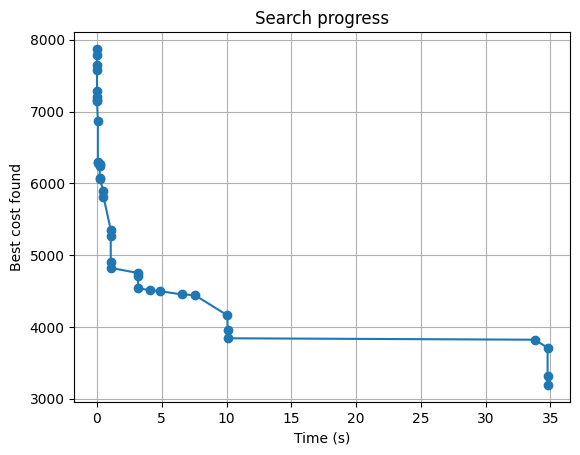

In [12]:
import time
import matplotlib.pyplot as plt

def place_best_solution(factory_size, dept_blocks, departments_area, flows, time_limit=5.0):
    rows, cols = factory_size
    grid = np.full((rows, cols), ".", dtype=object)
    used = set()
    solution = {}

    best_sol = None
    best_cost = float("inf")
    checked = 0
    improvements = []  # track (time, cost)

    start = time.time()

    dept_order = sorted(departments_area.keys(), key=lambda d: -departments_area[d])

    def find_next_empty():
        for r in range(rows):
            for c in range(cols):
                if grid[r, c] == ".":
                    return r, c
        return None

    def can_place(dept, r, c, h, w):
        if r + h > rows or c + w > cols:
            return False
        for i in range(r, r + h):
            for j in range(c, c + w):
                if grid[i, j] != ".":
                    return False
        return True

    def set_block(dept, r, c, h, w, val):
        for i in range(r, r + h):
            for j in range(c, c + w):
                grid[i, j] = dept if val else "."

    def backtrack():
        nonlocal best_sol, best_cost, checked

        if time.time() - start > time_limit:
            return

        if len(used) == len(departments_area):
            checked += 1
            current_cost = total_cost(solution, flows)
            if current_cost < best_cost:
                best_cost = current_cost
                best_sol = (grid.copy(), solution.copy())
                improvements.append((time.time() - start, best_cost))
            return

        pos = find_next_empty()
        if pos is None:
            return
        r, c = pos

        for dept in dept_order:
            if dept in used:
                continue
            for (h, w) in dept_blocks[dept]:
                if can_place(dept, r, c, h, w):
                    set_block(dept, r, c, h, w, True)
                    used.add(dept)
                    solution[dept] = (r, c, h, w)

                    backtrack()

                    set_block(dept, r, c, h, w, False)
                    used.remove(dept)
                    del solution[dept]

    backtrack()

    print(f"Checked {checked} complete solutions")
    return best_sol, best_cost, improvements

best_sol, best_cost, improvements = place_best_solution(factory_size, dept_blocks, departments_area, flows, time_limit=60.0)

if best_sol:
    grid, sol = best_sol
    print("Best cost found:", best_cost)
    print_colored_grid(grid)

# plot improvement over time
if improvements:
    times, costs = zip(*improvements)
    plt.plot(times, costs, marker="o")
    plt.xlabel("Time (s)")
    plt.ylabel("Best cost found")
    plt.title("Search progress")
    plt.grid(True)
    plt.show()


# Genetic Algorithm
Order gene: ['C', 'A', 'B']
Shape gene: [(2, 3), (1, 6), (2, 4)]


In [8]:
import random

class Chromosome:
    def __init__(self, order_gene, shape_gene):
        self.order_gene = order_gene[:]   # list of depts in order
        self.shape_gene = shape_gene[:]   # list of chosen (h,w) per dept
        self.fitness = None               # computed later

    @staticmethod
    def random(departments, dept_blocks):
        # Random permutation of departments
        order_gene = random.sample(departments, len(departments))
        # Random choice of block for each department
        shape_gene = [random.choice(dept_blocks[d]) for d in order_gene]
        return Chromosome(order_gene, shape_gene)

    def copy(self):
        return Chromosome(self.order_gene[:], self.shape_gene[:])
    
    def mutate(self, dept_blocks, prob_order=0.3, prob_shape=0.3):
        """
        Mutate this chromosome.
        - prob_order: probability of doing an order mutation (swap two depts)
        - prob_shape: probability of doing a shape mutation (change block of one dept)
        """
        n = len(self.order_gene)

        # order mutation (swap two departments)
        if random.random() < prob_order:
            i, j = random.sample(range(n), 2)
            self.order_gene[i], self.order_gene[j] = self.order_gene[j], self.order_gene[i]

        # shape mutation (change block size of a random dept)
        if random.random() < prob_shape:
            i = random.randrange(n)
            dept = self.order_gene[i]
            self.shape_gene[i] = random.choice(dept_blocks[dept])

    def print(self):
        print("Order gene:", self.order_gene)
        print("Shape gene:", self.shape_gene)
        print("Fitness:", self.fitness)


In [9]:
departments = list(departments_area.keys())

# create a random chromosome
chrom = Chromosome.random(departments, dept_blocks)
chrom.print()
chrom.mutate(dept_blocks)
chrom.print()

Order gene: ['B', 'A', '8', '3', '1', '9', '4', '5', '6', '2', '7']
Shape gene: [(6, 3), (12, 2), (10, 7), (2, 14), (12, 1), (14, 2), (6, 5), (4, 1), (1, 4), (1, 2), (2, 2)]
Fitness: None
Order gene: ['B', 'A', '8', '3', '1', '9', '4', '5', '6', '2', '7']
Shape gene: [(6, 3), (12, 2), (10, 7), (2, 14), (12, 1), (14, 2), (6, 5), (4, 1), (1, 4), (1, 2), (2, 2)]
Fitness: None


In [10]:
import numpy as np

def decode(chrom, factory_size, dept_blocks, flows):
    rows, cols = factory_size
    grid = np.full((rows, cols), ".", dtype=object)
    solution = {}

    def can_place(dept, r, c, h, w):
        if r + h > rows or c + w > cols:
            return False
        for i in range(r, r + h):
            for j in range(c, c + w):
                if grid[i, j] != ".":
                    return False
        return True

    def set_block(dept, r, c, h, w, val):
        for i in range(r, r + h):
            for j in range(c, c + w):
                grid[i, j] = dept if val else "."

    # Place departments sequentially
    for idx, dept in enumerate(chrom.order_gene):
        h, w = chrom.shape_gene[idx]
        placed = False
        for r in range(rows):
            for c in range(cols):
                if can_place(dept, r, c, h, w):
                    set_block(dept, r, c, h, w, True)
                    solution[dept] = (r, c, h, w)
                    placed = True
                    break
            if placed:
                break
        if not placed:
            # infeasible → huge penalty
            chrom.fitness = float("inf")
            return None, chrom.fitness

    cost = total_cost(solution, flows)
    chrom.fitness = cost
    return (grid, solution), cost


In [11]:
def crossover(p1, p2, dept_blocks):
    n = len(p1.order_gene)

    # Order crossover (OX)
    i, j = sorted(random.sample(range(n), 2))
    child_order = [None]*n
    child_order[i:j] = p1.order_gene[i:j]

    fill = [d for d in p2.order_gene if d not in child_order]
    k = 0
    for idx in range(n):
        if child_order[idx] is None:
            child_order[idx] = fill[k]
            k += 1

    # Shape gene: uniform crossover
    child_shapes = []
    for dept in child_order:
        if random.random() < 0.5 and dept in p1.order_gene:
            pos = p1.order_gene.index(dept)
            child_shapes.append(p1.shape_gene[pos])
        elif dept in p2.order_gene:
            pos = p2.order_gene.index(dept)
            child_shapes.append(p2.shape_gene[pos])
        else:
            child_shapes.append(random.choice(dept_blocks[dept]))

    return Chromosome(child_order, child_shapes)


In [12]:
def run_ga(factory_size, dept_blocks, departments_area, flows,
           pop_size=30, generations=100, time_limit=10.0):

    start = time.time()
    departments = list(departments_area.keys())

    # Initial population
    population = [Chromosome.random(departments, dept_blocks) for _ in range(pop_size)]

    best_sol = None
    best_cost = float("inf")
    improvements = []

    for gen in range(generations):
        if time.time() - start > time_limit:
            break

        # Evaluate
        for chrom in population:
            if chrom.fitness is None:
                _, cost = decode(chrom, factory_size, dept_blocks, flows)

        # Sort
        population.sort(key=lambda c: c.fitness)

        # Track best
        if population[0].fitness < best_cost:
            best_cost = population[0].fitness
            best_sol, _ = decode(population[0], factory_size, dept_blocks, flows)
            improvements.append((time.time() - start, best_cost))
            print(f"Gen {gen}, New best cost: {best_cost}")

        # Elitism
        new_pop = population[:pop_size//4]

        # Reproduce
        while len(new_pop) < pop_size:
            p1, p2 = random.sample(population[:pop_size//2], 2)
            child = crossover(p1, p2, dept_blocks)
            child.mutate(dept_blocks, prob_order=0.3, prob_shape=0.3)
            new_pop.append(child)

        population = new_pop

    return best_sol, best_cost, improvements


Gen 5, New best cost: 7318
Gen 7, New best cost: 6210
Gen 11, New best cost: 5764
Gen 12, New best cost: 4140
Gen 13, New best cost: 4024
Gen 24, New best cost: 4000
Gen 26, New best cost: 3866
Gen 28, New best cost: 2670
Gen 40, New best cost: 2210
Gen 44, New best cost: 2092
Gen 47, New best cost: 1880
Gen 49, New best cost: 1790
Gen 71, New best cost: 1630
Gen 75, New best cost: 1610
Gen 86, New best cost: 1570
Gen 91, New best cost: 1510
Gen 92, New best cost: 1330
Best GA cost: 1330
 3  3  3  3  3  3  3  3  3  3  3  3  3  3 
 3  3  3  3  3  3  3  3  3  3  3  3  3  3 
 2  2  2  2  2  2  2  8  8  6  7  1  1  1 
 2  2  2  2  2  2  2  8  8  6  7  1  1  1 
 2  2  2  2  2  2  2  A  9  6  7  1  1  1 
 2  2  2  2  2  2  2  A  9  6  7  1  1  1 
 5  5  5  5  5  5  5  5  5  4  4  4  4  4 
 5  5  5  5  5  5  5  5  5  4  4  4  4  4 
 B  B  B  B  B  B  B  B  B  4  4  4  4  4 
 B  B  B  B  B  B  B  B  B  4  4  4  4  4 
 .  .  .  .  .  .  .  .  .  4  4  4  4  4 
 .  .  .  .  .  .  .  .  .  4  4  

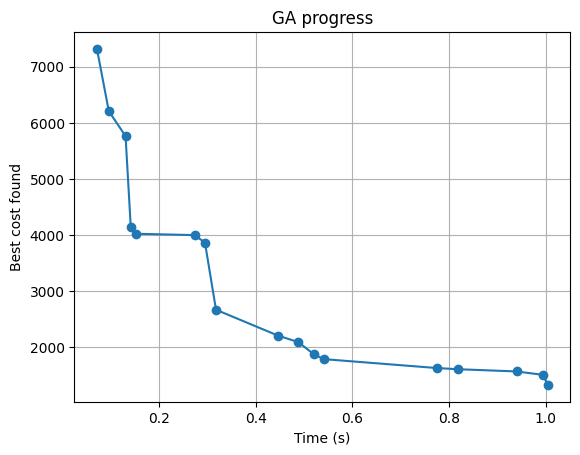

In [23]:
best_sol, best_cost, improvements = run_ga(factory_size, dept_blocks, departments_area, flows,
                                           pop_size=50, generations=100, time_limit=10.0)

if best_sol:
    grid, sol = best_sol
    print("Best GA cost:", best_cost)
    print_colored_grid(grid)

if improvements:
    times, costs = zip(*improvements)
    plt.plot(times, costs, marker="o")
    plt.xlabel("Time (s)")
    plt.ylabel("Best cost found")
    plt.title("GA progress")
    plt.grid(True)
    plt.show()
